In [27]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv('TCS Stock Data.csv')

In [3]:
stock_data.info

<bound method DataFrame.info of     Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0      TCS     EQ  20-Jan-2021     3260.70     3270.00     3327.95    3267.10   
1      TCS     EQ  21-Jan-2021     3308.80     3305.00     3309.15    3262.10   
2      TCS     EQ  22-Jan-2021     3273.85     3241.90     3325.00    3241.90   
3      TCS     EQ  25-Jan-2021     3303.10     3308.95     3339.80    3278.65   
4      TCS     EQ  27-Jan-2021     3291.30     3300.00     3306.45    3227.00   
..     ...    ...          ...         ...         ...         ...        ...   
499    TCS     EQ  13-Jan-2023     3334.35     3342.90     3379.00    3305.00   
500    TCS     EQ  16-Jan-2023     3374.55     3317.00     3353.00    3298.05   
501    TCS     EQ  17-Jan-2023     3334.05     3330.00     3381.80    3321.00   
502    TCS     EQ  18-Jan-2023     3378.40     3380.00     3408.95    3372.25   
503    TCS     EQ  19-Jan-2023     3390.00     3380.00     3387.00    3361.00

In [4]:
stock_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
count,504.000000,504.000000,504.00000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,5.040000e+02,504.000000
mean,3376.338988,3381.042956,3410.83750,3347.798016,3379.740179,3379.143155,3379.738571,2.456577e+06,8.308264e+09,141390.940476
std,261.542968,254.600272,255.56504,251.702958,253.904388,254.349012,253.646693,1.243860e+06,4.321558e+09,71945.040498
min,2015.050000,2926.000000,2965.00000,2880.000000,2903.850000,2894.300000,2916.680000,2.609490e+05,8.263686e+08,1.000000
25%,3177.200000,3184.900000,3214.75000,3150.750000,3178.212500,3177.712500,3178.277500,1.637929e+06,5.590723e+09,100512.250000
50%,3317.950000,3322.375000,3343.45000,3283.475000,3319.575000,3319.050000,3314.135000,2.130050e+06,7.217435e+09,124664.000000
75%,3578.750000,3582.162500,3611.75000,3539.037500,3576.175000,3578.750000,3575.460000,2.946499e+06,9.770990e+09,162483.250000
max,4019.150000,4033.950000,4043.00000,3980.000000,4025.000000,4019.150000,4010.330000,1.184540e+07,4.385966e+10,704881.000000


In [5]:
stock_data.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [6]:
stock_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
499,TCS,EQ,13-Jan-2023,3334.35,3342.9,3379.00,3305.00,3373.25,3374.55,3352.96,1742837,5.843664e+09,107218,870219,49.93
500,TCS,EQ,16-Jan-2023,3374.55,3317.0,3353.00,3298.05,3335.00,3334.05,3329.16,1843607,6.137669e+09,134180,901765,48.91
501,TCS,EQ,17-Jan-2023,3334.05,3330.0,3381.80,3321.00,3380.90,3378.40,3363.96,1688475,5.679962e+09,110473,1114320,66.00
502,TCS,EQ,18-Jan-2023,3378.40,3380.0,3408.95,3372.25,3391.00,3390.00,3395.06,2421189,8.220094e+09,121397,1836244,75.84
503,TCS,EQ,19-Jan-2023,3390.00,3380.0,3387.00,3361.00,3370.00,3373.10,3375.44,1585044,5.350223e+09,97108,1136996,71.73


In [11]:
params = stock_data[['Date', 'Close Price']]
params =params.rename(columns = {'Date':'ds', 'Close Price':'y'})
params

,ds,y
0,20-Jan-2021,3308.80
1,21-Jan-2021,3273.85
2,22-Jan-2021,3303.10
3,25-Jan-2021,3291.30
4,27-Jan-2021,3261.05
...,...,...
499,13-Jan-2023,3374.55
500,16-Jan-2023,3334.05
501,17-Jan-2023,3378.40
502,18-Jan-2023,3390.00


Fetching last 10 days data in a variable.

In [15]:
last_ten_days = params[-10:]
last_ten_days

,ds,y
494,06-Jan-2023,3211.55
495,09-Jan-2023,3319.95
496,10-Jan-2023,3286.40
497,11-Jan-2023,3328.70
498,12-Jan-2023,3334.35
499,13-Jan-2023,3374.55
500,16-Jan-2023,3334.05
501,17-Jan-2023,3378.40
502,18-Jan-2023,3390.00
503,19-Jan-2023,3373.10


In [16]:
rem_data = params[:-10]
rem_data

,ds,y
0,20-Jan-2021,3308.80
1,21-Jan-2021,3273.85
2,22-Jan-2021,3303.10
3,25-Jan-2021,3291.30
4,27-Jan-2021,3261.05
...,...,...
489,30-Dec-2022,3256.70
490,02-Jan-2023,3261.45
491,03-Jan-2023,3311.35
492,04-Jan-2023,3314.65


In [19]:
prop_obj = Prophet(daily_seasonality=True)

In [20]:
prop_obj.fit(rem_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqdc2kwc/brciphe_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqdc2kwc/jn82_u8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92741', 'data', 'file=/tmp/tmphqdc2kwc/brciphe_.json', 'init=/tmp/tmphqdc2kwc/jn82_u8e.json', 'output', 'file=/tmp/tmphqdc2kwc/prophet_model581bouiw/prophet_model-20230119143529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future = prop_obj.make_future_dataframe(periods=365)
forecast = prop_obj.predict(future)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-20,3268.461201,2969.089439,3288.633675,3268.461201,3268.461201,-145.552511,-145.552511,-145.552511,-145.633096,-145.633096,-145.633096,0.080586,0.080586,0.080586,0.0,0.0,0.0,3122.908691
1,2021-01-21,3268.553070,2957.015043,3266.284768,3268.553070,3268.553070,-149.686554,-149.686554,-149.686554,-145.633096,-145.633096,-145.633096,-4.053457,-4.053457,-4.053457,0.0,0.0,0.0,3118.866516
2,2021-01-22,3268.644938,2954.143276,3272.134690,3268.644938,3268.644938,-155.800115,-155.800115,-155.800115,-145.633096,-145.633096,-145.633096,-10.167019,-10.167019,-10.167019,0.0,0.0,0.0,3112.844822
3,2021-01-25,3268.920542,2942.676571,3261.611488,3268.920542,3268.920542,-160.051490,-160.051490,-160.051490,-145.633096,-145.633096,-145.633096,-14.418394,-14.418394,-14.418394,0.0,0.0,0.0,3108.869052
4,2021-01-27,3269.104279,2967.128622,3278.386137,3269.104279,3269.104279,-145.552511,-145.552511,-145.552511,-145.633096,-145.633096,-145.633096,0.080586,0.080586,0.080586,0.0,0.0,0.0,3123.551768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2024-01-01,3678.869891,2527.396722,4524.198444,2735.875766,4663.575396,-160.051490,-160.051490,-160.051490,-145.633096,-145.633096,-145.633096,-14.418394,-14.418394,-14.418394,0.0,0.0,0.0,3518.818401
848,2024-01-02,3679.561910,2555.275637,4519.913243,2731.568076,4668.659643,-153.483058,-153.483058,-153.483058,-145.633096,-145.633096,-145.633096,-7.849962,-7.849962,-7.849962,0.0,0.0,0.0,3526.078852
849,2024-01-03,3680.253928,2565.907332,4506.534303,2727.260387,4673.743891,-145.552511,-145.552511,-145.552511,-145.633096,-145.633096,-145.633096,0.080586,0.080586,0.080586,0.0,0.0,0.0,3534.701417
850,2024-01-04,3680.945947,2555.440219,4494.987955,2722.952697,4678.828138,-149.686554,-149.686554,-149.686554,-145.633096,-145.633096,-145.633096,-4.053457,-4.053457,-4.053457,0.0,0.0,0.0,3531.259393


In [37]:
forecast[forecast.ds == '2023-01-06']['yhat']

487    3273.943084
Name: yhat, dtype: float64

In [54]:
check = forecast[forecast['ds'].between('2023-01-06', '2023-01-19')]
check = check[['ds', 'yhat']]
check

,ds,yhat
487,2023-01-06,3273.943084
488,2023-01-07,3303.006246
489,2023-01-08,3303.698262
490,2023-01-09,3271.767765
491,2023-01-10,3279.028216
492,2023-01-11,3287.650782
493,2023-01-12,3284.208757
494,2023-01-13,3278.787214
495,2023-01-14,3307.850376
496,2023-01-15,3308.542392


In [26]:
last_ten_days

,ds,y
494,06-Jan-2023,3211.55
495,09-Jan-2023,3319.95
496,10-Jan-2023,3286.40
497,11-Jan-2023,3328.70
498,12-Jan-2023,3334.35
499,13-Jan-2023,3374.55
500,16-Jan-2023,3334.05
501,17-Jan-2023,3378.40
502,18-Jan-2023,3390.00
503,19-Jan-2023,3373.10


In [25]:
plot_plotly(prop_obj, forecast)

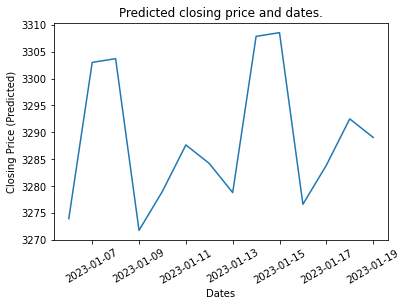

In [71]:
plt.plot(check['ds'], check["yhat"])
plt.title('Predicted closing price and dates.')
plt.xlabel('Dates')
plt.ylabel('Closing Price (Predicted)')
plt.xticks(rotation = 30)
plt.show()

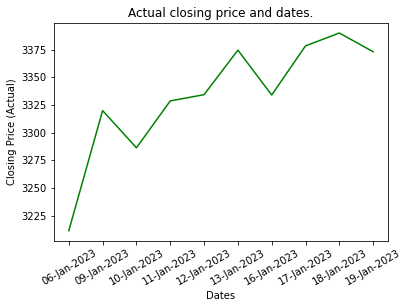

In [79]:
plt.plot(last_ten_days['ds'], last_ten_days["y"], color = 'green')
plt.title('Actual closing price and dates.')
plt.xlabel('Dates')
plt.ylabel('Closing Price (Actual)')
plt.xticks(rotation = 30)
plt.show()

ValueError: ignored

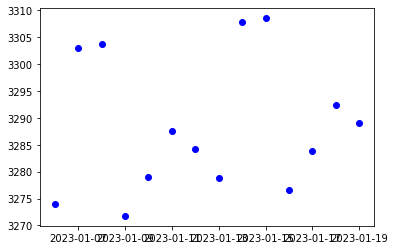

In [80]:
plt.scatter(check['ds'], check["yhat"], label = 'Predicted Prices', color = 'blue')
plt.scatter(last_ten_days['ds'], last_ten_days["y"], color = 'green', label = 'Actual Prices')
plt.title("Predicted stock closing prices' vs Actual closing prices with dates.")
plt.xlabel('Dates')
plt.ylabel('Closing Price (Actual)')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

In [82]:
check['ds']

487   2023-01-06
488   2023-01-07
489   2023-01-08
490   2023-01-09
491   2023-01-10
492   2023-01-11
493   2023-01-12
494   2023-01-13
495   2023-01-14
496   2023-01-15
497   2023-01-16
498   2023-01-17
499   2023-01-18
500   2023-01-19
Name: ds, dtype: datetime64[ns]

In [90]:
last_ten_days['ds']

494    06-Jan-2023
495    09-Jan-2023
496    10-Jan-2023
497    11-Jan-2023
498    12-Jan-2023
499    13-Jan-2023
500    16-Jan-2023
501    17-Jan-2023
502    18-Jan-2023
503    19-Jan-2023
Name: ds, dtype: object

In [111]:
new_dates = []
for date in last_ten_days['ds']:
  new_dates.append(date[-4:] + '-01-' + date[:2])
c_last_ten_days = pd.DataFrame({'ds':new_dates, 'y':last_ten_days['y']})
c_last_ten_days = c_last_ten_days.astype({'ds':'datetime64[ns]'})

In [113]:
c_last_ten_days['ds']

494   2023-01-06
495   2023-01-09
496   2023-01-10
497   2023-01-11
498   2023-01-12
499   2023-01-13
500   2023-01-16
501   2023-01-17
502   2023-01-18
503   2023-01-19
Name: ds, dtype: datetime64[ns]

In [108]:
check['ds']

487   2023-01-06
488   2023-01-07
489   2023-01-08
490   2023-01-09
491   2023-01-10
492   2023-01-11
493   2023-01-12
494   2023-01-13
495   2023-01-14
496   2023-01-15
497   2023-01-16
498   2023-01-17
499   2023-01-18
500   2023-01-19
Name: ds, dtype: datetime64[ns]

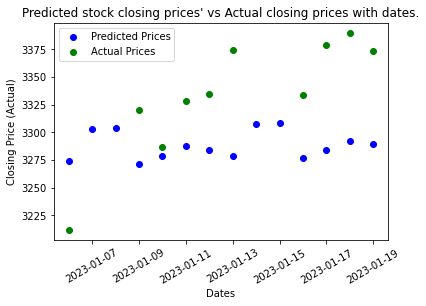

In [114]:
plt.scatter(check['ds'], check["yhat"], label = 'Predicted Prices', color = 'blue')
plt.scatter(c_last_ten_days['ds'], c_last_ten_days["y"], color = 'green', label = 'Actual Prices')
plt.title("Predicted stock closing prices' vs Actual closing prices with dates.")
plt.xlabel('Dates')
plt.ylabel('Closing Price (Actual)')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

Trend lines don't superimpose but rise/fall of prices kind of are similar.

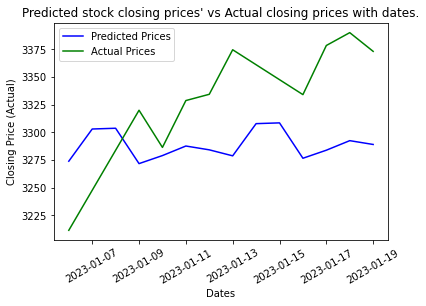

In [115]:
plt.plot(check['ds'], check["yhat"], label = 'Predicted Prices', color = 'blue')
plt.plot(c_last_ten_days['ds'], c_last_ten_days["y"], color = 'green', label = 'Actual Prices')
plt.title("Predicted stock closing prices' vs Actual closing prices with dates.")
plt.xlabel('Dates')
plt.ylabel('Closing Price (Actual)')
plt.xticks(rotation = 30)
plt.legend()
plt.show()